# DEMO 5

Elastic Net Regression applied to Stock Market Data


In [1]:
import sys
import os

# Manually set the path relative to the py file's location that you want to import
func_lib_path = os.path.abspath(os.path.join(os.getcwd(), '../'))# Add the path to sys.path
sys.path.append(func_lib_path)

# Now you can import func_lib
import func_lib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet

In [4]:
historical_prices = func_lib.createHistPrices()
list_of_momentums = [1, 5, 15, 20]
total_returns     = func_lib.computingReturns(historical_prices, list_of_momentums)
total_returns.dropna(inplace=True)

[*********************100%%**********************]  501 of 501 completed

1 Failed download:
['SW']: YFChartError("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1714536000")


In [5]:
# Determine the split index for 70% of the dates
unique_dates = total_returns.index.get_level_values('Date').unique()
split_date = unique_dates[int(0.7 * len(unique_dates))]
# Create the training set: all data before the split date
train_data = total_returns.loc[total_returns.index.get_level_values('Date') < split_date]

# Create the testing set: all data from the split date onwards
test_data = total_returns.loc[total_returns.index.get_level_values('Date') >= split_date]

features = ['1_d_returns', '5_d_returns', '15_d_returns', '20_d_returns']
target   = ['F_1_d_returns']

# Split the data into training and testing sets
X_train = train_data[features]
X_test  = test_data[features]
y_train = train_data[target]
y_test  = test_data[target]

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)
X_test_scaled  = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)

In [10]:
model = ElasticNet(alpha=0.001, l1_ratio=0.5) 
model.fit(X_train_scaled, y_train)

ElasticNet(alpha=0.001)

In [11]:
model_name = 'ElasticNet'
# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_df = pd.DataFrame(y_pred, index= X_test_scaled.index)
y_pred_df.rename(columns={0:model_name}, inplace=True)

y_test_df = pd.DataFrame(y_test)

y_test_and_pred = pd.merge(y_test_df, y_pred_df, left_index=True, right_index=True)

In [ ]:
model_name = 'ElasticNet'
# Define trading strategy based on ElasticNet
def trading_strategy(y_pred):
    if y_pred >0:
        return  1 # Go long
    else:
        return 0
        

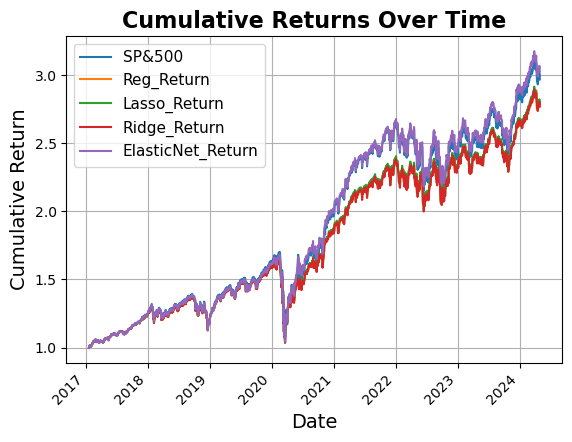

The CAGR is: 16.35%
Sharpe Ratio of Strategy: 0.89


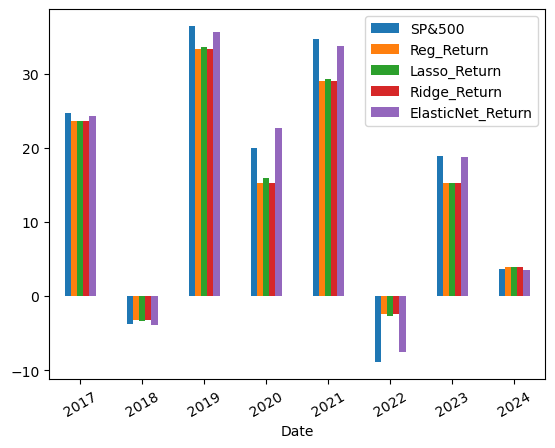

In [12]:
cum_returns, calendar_returns = func_lib.compute_strat_perf(y_test_and_pred, cum_returns, calendar_returns, trading_strategy, model_name)